In [1]:
#Importing all the required modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound as play

#%matplotlib inline

In [2]:
# This is the algorithm for computing DTFT of given signal
# The parameters for this Algorithm is a signal of shape (2, N) or  (N, )
# it has some default parameters like lower limit, higher limit and Number of points for omega axis

def dtft(signal, low_lim=-1*np.pi, high_lim=np.pi, N=100, endpoints=False):
    w = np.linspace(low_lim, high_lim, N, endpoint=endpoints)                  #Array of omega values
    e_jw = np.exp(w*1j)                                                    #computes e^{jw}
    
    # Creates a dictnationry to store dtft, Magnitude, Phase and omega
    dtft = dict()        
    # Creates a empty array for dtft
    dtft['complex'] = np.zeros(N, dtype=complex) 
    # Assiging omega values 
    dtft['omega'] = w
    
    # The following conditional statements are for checking whether the input(signal) is been provided with 
    # time stamps
    if signal.shape[0] == 2:
        for i in range(signal.shape[1]):
            dtft['complex'] += signal[0, i]*np.power(e_jw, -1*signal[1, i])
    else:
        for i in range(signal.shape[0]):
            dtft['complex'] += signal[i]*np.power(e_jw, -1*i)

    # Rounds-off the result upto 4 decimal places
    dtft['complex'] = np.round(dtft['complex'], decimals=4)
    # Finds the magnitude of the dtft computed above.
    dtft['magnitude'] = np.absolute(dtft['complex'])
    # Finds the phase of dtft in radians which lies in the range[-pi, pi]
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft


# This below function flips the w axis 
# Input:- X(e^jw) 
# Output:- X(e^-jw)
def negate_dtft(dtft):
    dtft['complex'] = np.flip(dtft['complex'])
    dtft['magnitude'] = np.absolute(dtft['complex'])
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft

# This below function finds the conjugate of dtft.
# Input:- X(e^jw) 
# Output:- X*(e^jw)
def conjugate(dtft):
    dtft['complex'] = np.conj(dtft['complex']) 
    dtft['phase'] = -1*dtft['phase']
    return dtft

In [3]:
# This function is used for plotting Real part, Imaginary part, Magnitude and Phase for a given DTFT

def dtft_plotter(dtft, title=None, complex_part=True):
    plt.rcParams['figure.figsize'] = [10, 8] #Setting the plotting area
    
    if complex_part:                         #For complex signals
        fig, ax = plt.subplots(2,2)

        if title != None:                    #Setting title
            fig.suptitle(title, fontweight="bold")
        #Plotting the real part
        ax[0, 0].title.set_text('Real Part')
        ax[0, 0].stem(dtft['omega'], np.real(dtft['complex']))
        ax[0, 0].set(ylabel='$Re\{X(e^{j \omega})\}$')
        #Plotting the Imaginary part
        ax[0, 1].title.set_text('Imaginary Part')
        ax[0, 1].stem(dtft['omega'], np.imag(dtft['complex']), 'tab:red')
        ax[0, 1].yaxis.tick_right()
        ax[0, 1].set(ylabel='$Im\{X(e^{j \omega})\}$')
        #Plotting the Magnitude of DTFT
        ax[1, 0].title.set_text('Magnitude')
        ax[1, 0].stem(dtft['omega'], dtft['magnitude'], 'tab:orange')
        ax[1, 0].set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')
        #Plotting the Phase of DTFT
        ax[1, 1].title.set_text('Phase')
        ax[1, 1].stem(dtft['omega'], dtft['phase'], 'tab:green')
        ax[1, 1].yaxis.tick_right()        
        ax[1, 1].set(ylabel='$\phi$')
    else:                                   #For Real signal
        #Plotting the Magnitude of DTFT
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.stem(dtft['omega'],dtft['magnitude'])
        ax1.set(xlabel='$\omega$', ylabel='$X(e^{j \omega})$')
        ax1.title.set_text('Magnitude')
        #Plotting the Phase of DTFT
        ax2.stem(dtft['omega'],dtft['phase'], 'tab:green')
        ax2.plot(xlabel = 'n', ylabel=r'$\phi$')
        ax2.title.set_text('Phase')

In [4]:
#This below function will take a file as .wav audio file as input and that verbose default parameter which will
#helpful for printing Specifications of audio file such as #frames, framerate, duration, etc.
#Output of this function will return audio signal array, time duration and Number of frames

def wavfile_to_nparray(FILE, verbose=0, time_len=None, normalise=False):
    audio_file = wave.open(FILE, 'rb')             #Opening the .wav file
    params = audio_file.getparams()                #Getting parameters of the audio file
    fr = params[2]
    if time_len != None:
        nframes = int(time_len*fr)
    else:
        nframes = params[3]
    audio_frame = audio_file.readframes(nframes)        #Reading all frames of the audio file 
    audio = np.zeros(nframes)                    #Creating an empty array for storing the values
    
    # Since the frames are3 being stores as bytes format each value will be a size of 1Byte(*bits)
    # Thus we get values ranging from 0 to 255
    # To avoid large values of dtft magnitude so we are normalizing signal from -1 to 1 
    # the audio signal to have better representation in time domain
    
    for i in range(len(audio_frame)):              
        audio[i] = audio_frame[i]                  #Storing the byte value in int array

    duration = nframes/fr                 #Time duration of the signal
    #Normalising the wave amplitude
    if normalise:
        audio = audio/2**7 - 1
    #Printing all the parameters of the wave
    if verbose:
        print('Channels=',params[0], ', SampleWidth=', params[1],'\bbytes' 
              ,', Framerate=', fr, '\bHz', ', Frames=', nframes, '\nDuration:', time_len if time_len else 
              duration, '\bs\n')
    return audio, duration, nframes, fr

#This below function will Plot the Time signal. Computes DTFT and also plots Magnitude and phase

def analyise_wav_file(file, normalise, time_len=None, verbose=0):
    #Reading the wave file, and converting to array
    audio, t, frames, _ = wavfile_to_nparray(file, verbose=verbose, time_len=time_len, normalise=normalise)
    time = np.linspace(0, t, frames)          #Time scale
    
    dtft_audio = dtft(audio, N=100)           #Finding the DTFT of the wave file
    
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    
    plt.figure()                                            #Plotting Time signal
    plt.title(file, fontsize='large', fontweight='bold')
    plt.plot(time, audio, color='green')

#                                                             #Plotting Magnitude and Phase
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.suptitle("DTFT of "+file)
    ax1.title.set_text('Magnitude')
    ax1.stem(dtft_audio['omega'], dtft_audio['magnitude'])
    ax1.set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')

    ax2.title.set_text('Phase')
    ax2.set(xlabel='$\omega$', ylabel='$\phi$')
    ax2.stem(dtft_audio['omega'], dtft_audio['phase'], 'tab:red')
#     dtft_plotter(dtft_audio)

In [5]:
#Function for creating a wave file with required framerate
def fr_alter(file, fr_scale, nchannels=1, sampwidth=1):
    audio_file = wave.open(file, 'rb')    #Reading the original wave file
    audio_data = audio_file.readframes(-1)#Gettig the data of original wave file
    audio_fr =  audio_file.getframerate() #Finding the framerate
    audio_file.close()                    #Closing the wave file
    
    #Creating a new wave file
    new_filename = file[:-4]+'_' + str(fr_scale) +'fs.wav'#Setting the name 
    new_file = wave.open(new_filename, 'wb')#Opening the new file to write
    #Setting all the parameters
    new_file.setnchannels(nchannels) #Channel
    new_file.setsampwidth(sampwidth) #Samplewidth
    new_file.setframerate(fr_scale*audio_fr)#Framerate
    new_file.writeframesraw(audio_data)#Writing the data from original file
    new_file.close()#Closing the new file
    
    return new_filename

Playback speed is slower and has very low pitch.
The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted low frequency components are also having spikes seen here.The spike seen in original magnitude plot in between (2, 3) in omega axis is also observed in new audio file in  between (1, 2)


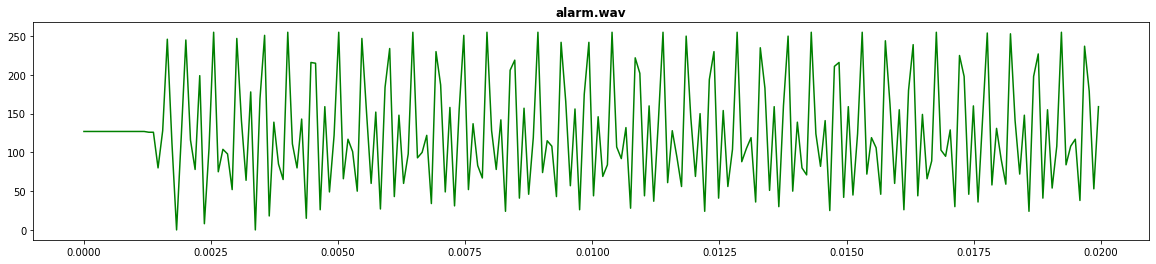

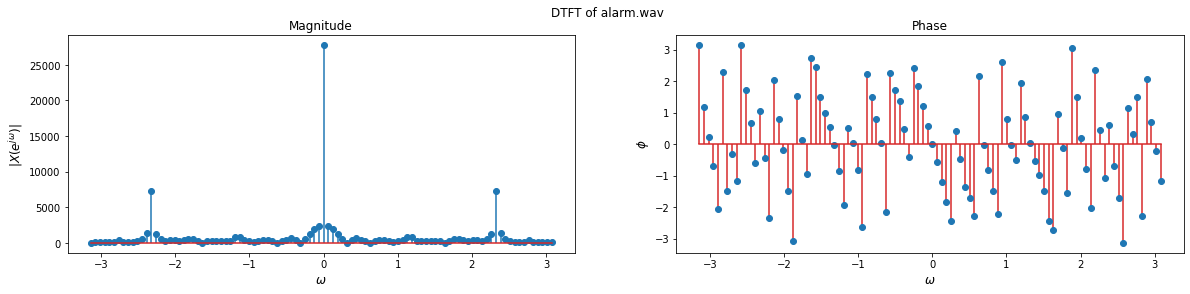

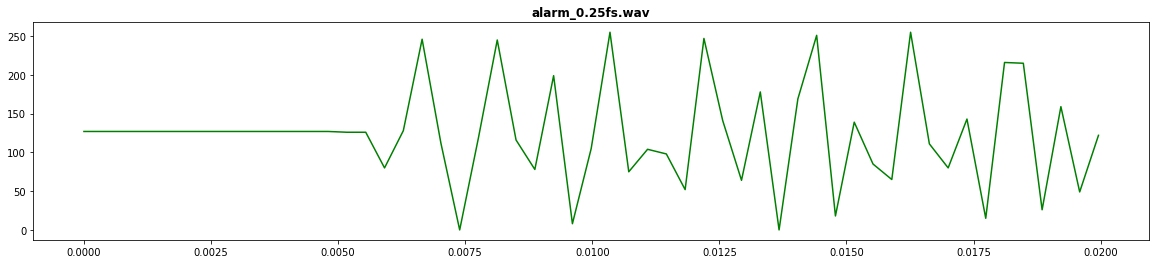

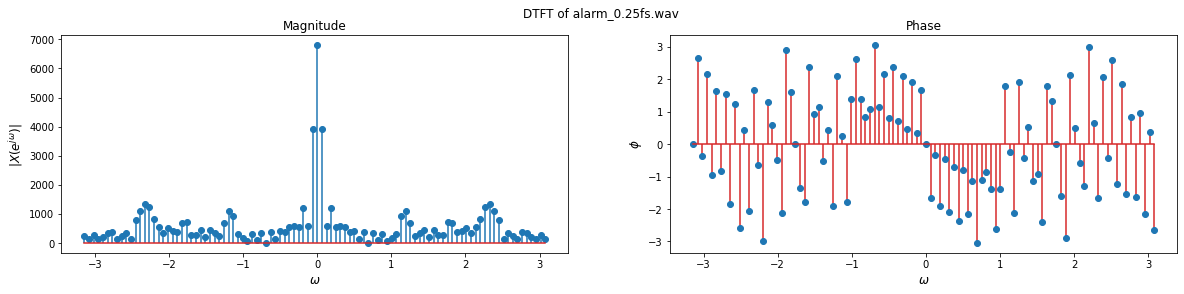

In [6]:
#Problem-1:
#Playing Alarm file altering the sampling frequency
file = 'alarm.wav'
#0.25*fs
new_filename = fr_alter(file, 0.25)#Creating the required file
play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms

print("Playback speed is slower and has very low pitch.")
print("The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted"
      , "low frequency components are also having spikes seen here.The spike seen in"
      , "original magnitude plot in between (2, 3) in omega axis is also observed in new audio file in "
      , "between (1, 2)")

Playback speed is slow and has low pitch.
The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted low frequency components are also having spikes seen here.The spike seen in original magnitude plot in between (2, 3) in omega axis is also observed in new audio file in  between (1, 2). But this new framerate is better than previously observed.


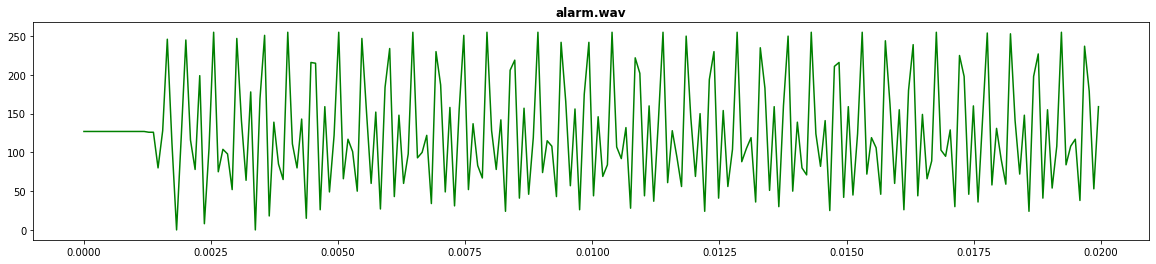

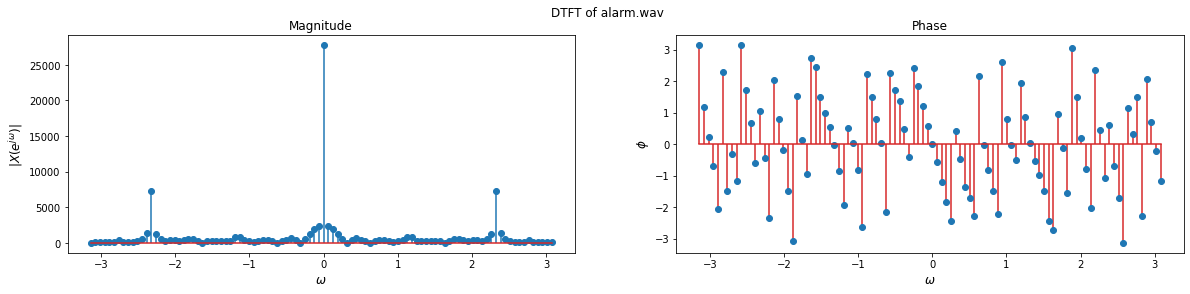

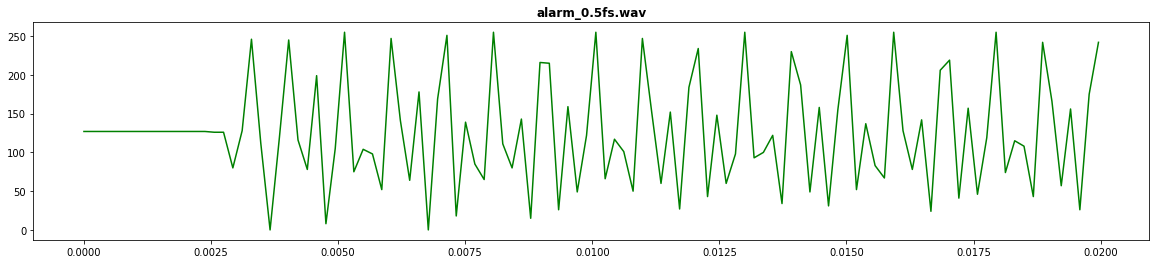

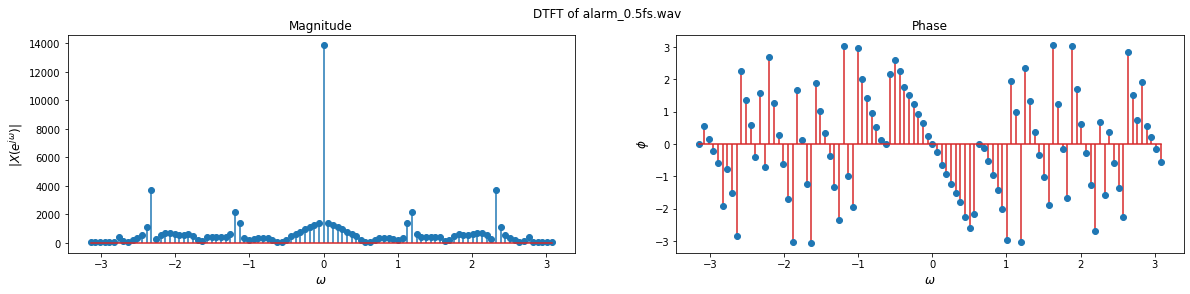

In [7]:
#Alarm file at 0.5*fs
new_filename = fr_alter(file, 0.50)#Creating the required file
play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms


print("Playback speed is slow and has low pitch.")
print("The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted"
      , "low frequency components are also having spikes seen here.The spike seen in"
      , "original magnitude plot in between (2, 3) in omega axis is also observed in new audio file in "
      , "between (1, 2). But this new framerate is better than previously observed.")

In [8]:
#Alarm file at fs
new_filename = fr_alter(file, 1)#Creating the required file
play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms
print("Playback speed is same.")
print("This is just same as the original audio content")

Playback speed is same.
This is just same as the original audio content
Error in callback <function flush_figures at 0x7fc5d7a10790> (for post_execute):


KeyboardInterrupt: 

Playback speed is fast and has high pitch.
Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is no aliasing effect


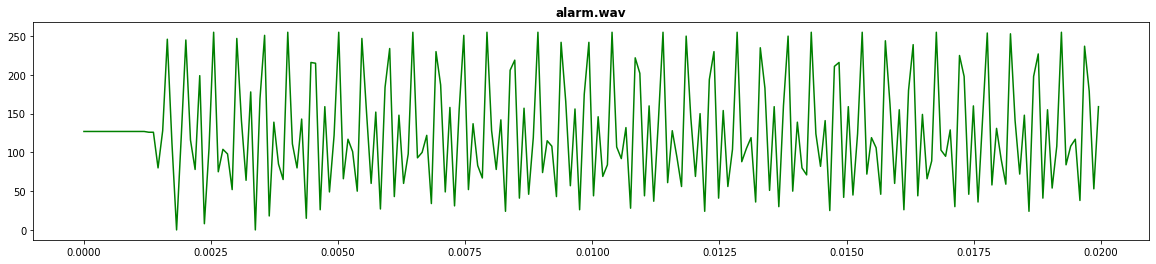

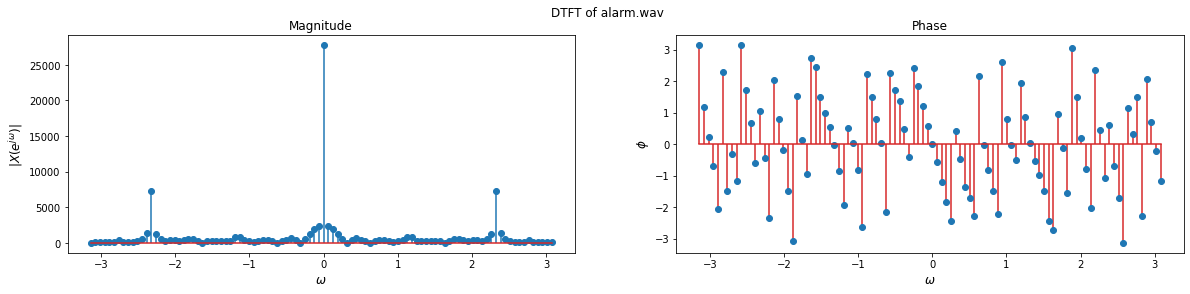

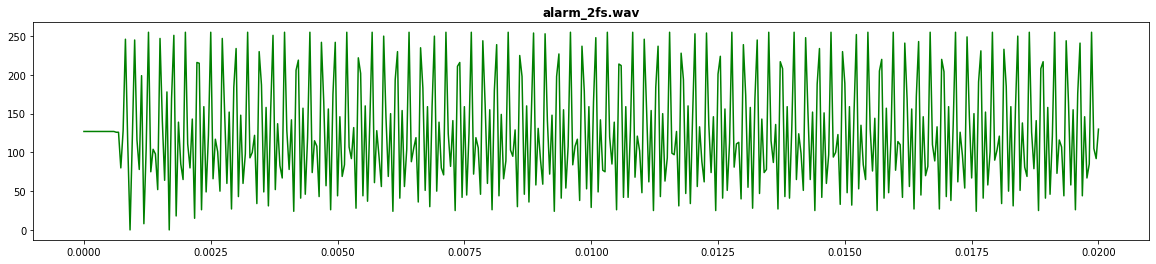

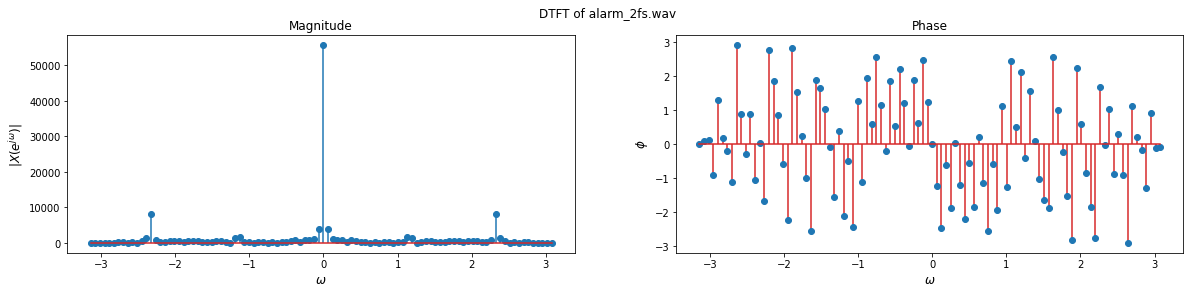

In [9]:
#Alarm file at 2*fs
new_filename = fr_alter(file, 2)#Creating the required file
play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms
print("Playback speed is fast and has high pitch.")
print("Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is",
      "no aliasing effect")

In [10]:
#Playing Armageddon file altering the sampling frequency
#Armageddon file at 0.25*fs
file = 'armageddon.wav'

new_filename = fr_alter(file, 0.25)#Creating the required file
play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms


print("Playback speed is slow and has  low pitcher and has very low pitch.")
print("The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted"
      , "low frequency components are enhanced where their bandwidth is been increased significantly compared to original one")

KeyboardInterrupt: 

In [ ]:
#Armageddon file at 0.5*fs
new_filename = fr_alter(file, 0.50)#Creating the required file

play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms

print("Playback speed is slow and has  low pitch.")
print("The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted"
      , "low frequency components are enhanced where their bandwidth is been increased compared to original one"
      ,".But this new framerate is better than previously observed.")

In [ ]:
#Armageddon file at 1*fs
new_filename = fr_alter(file, 1)#Creating the required file

play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms

print("Playback speed is same.")
print("This is just same as the original audio content")

In [ ]:
#Armageddon file at 2*fs
new_filename = fr_alter(file, 2)#Creating the required file

play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms
print("Playback speed is fast and has high pitch.")
print("Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is",
      "no aliasing effect")

In [ ]:
#Playing Cry file altering the sampling frequency
#Cry file at 0.25*fs
file = 'cry.wav'
new_filename = fr_alter(file, 0.25)#Creating the required file

play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms
print("Playback speed is slower and has very low pitch.")
print("The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted"
      , "low frequency components are enhanced where their bandwidth is been increased significantly compared to original one")

In [ ]:
#Cry file at 0.5*fs
new_filename = fr_alter(file, 0.50)#Creating the required file

play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms
print("Playback speed is slow and has low pitch.")
print("The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted"
      , "low frequency components are enhanced where their bandwidth is been increased compared to original one"
      ,".But this new framerate is better than previously observed.")

In [ ]:
#Cry file at 1*fs
new_filename = fr_alter(file, 1)#Creating the required file

play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms
print("Playback speed is same.")
print("This is just same as the original audio content")

In [ ]:
#Cry file at 2*fs
new_filename = fr_alter(file, 2)#Creating the required file

play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms

print("Playback speed is fast and has high pitch.")
print("Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is",
      "no aliasing effect")

In [ ]:
#Playing Wow file altering the sampling frequency
#Wow file at 0.25*fs
file = 'wow.wav'
new_filename = fr_alter(file, 0.25)#Creating the required file
play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms
print("Playback speed is slower and has very low pitch.")
print("The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted"
      , "low frequency components are enhanced where their bandwidth is been increased significantly compared to original one")

In [ ]:
new_filename = fr_alter(file, 0.50)#Creating the required file
#Wow file at 0.5*fs
play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms
print("Playback speed is slow and has low pitch.")
print("The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted"
      , "low frequency components are enhanced where their bandwidth is been increased compared to original one"
      ,".But this new framerate is better than previously observed.")

In [ ]:
new_filename = fr_alter(file, 1)#Creating the required file
#Wow file at 1*fs
play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms
print("Playback speed is same.")
print("This is just same as the original audio content")

In [ ]:
new_filename = fr_alter(file, 2)#Creating the required file
#Wow file at 2*fs
play(file)#Playing the original file
analyise_wav_file(file, time_len=0.02, normalise=False)#Analysing the wave till 2ms

play(new_filename)#Playing the new altered frequency file
analyise_wav_file(new_filename, time_len=0.02, normalise=False)#Analysing the wave till 2ms
print("Playback speed is fast and has high pitch.")
print("Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is",
      "no aliasing effect")

In [ ]:
#PROBLEM 1.c : Problem when sampling frquency is exactly twice the highest non-zero frequency

print("Whenever the magnitude at the lower bound or upper bound of a band-limited signal"
      , "has a non-zero component there will be aliasing at the sampling frequency(pi/T),"
      , "w0/2's corresponding magnitude is being increased.")
print("\nEXAMPLE:")

N = 100                           #Number of data points of w
w = np.linspace(-1*np.pi, np.pi, N)#frequency scale
w0 = np.pi/2                      #Maximum non zero component frequency

X = np.zeros(N)                   #Considered examples DTFT
#Calculating the DTFT of some x(t)
for i in range(N):
    if(i <= 24):   
        X[i] = 0
    elif(i <= 49):
        X[i] = np.exp(w[i])
    elif(i <= 75):
        X[i] = 1 - w[i]/np.pi
    else:
        X[i] = 0
#Plotting the DTFT, X(jw) 
plt.rcParams['figure.figsize'] = [8, 4]#Setting plot area
plt.rc('axes', labelsize=12)#Setting label widths
#DTFT
plt.figure()
plt.title("Band-limited signal")
plt.stem(w, X)
plt.xlabel("$\Omega$")
plt.ylabel("$X_a(j\Omega)$")
#Interpolation of DTFT: replicated and shifted X
plt.figure()
plt.title("Sampled at exact nyquist frequency.")
plt.stem(w, X + np.roll(X,50))
plt.xlabel("$\Omega$")
plt.ylabel("$\sum_{n=-\infty}^{\infty}X(j(\Omega- {n\pi}/{T}))$")

plt.figure()
plt.title("Sampled at more than nyquist frequency.")
X = np.hstack((np.zeros(10), X, np.zeros(10)))
X = X + np.roll(X, 55)
plt.stem(w, X[10:N+10])
plt.xlabel("$\Omega$")
plt.ylabel("$\sum_{n=-\infty}^{\infty}X(j(\Omega- {n\pi}/{T}))$")


In [ ]:
#Function for doing convolution
#Method adopted : Shift and Overlap; Moving window-h
def convolve(x, h, plot=True):
    n  =  x.shape[0]#Finding the length of the x input
    m = h.shape[0]#Finding the length of the impulse function
    print("x[n]: ", x)#Input Sequence
    print("h[n]: ", h)#Impulse response
    h = np.flip(h)#Flipping the impulse response
    pads = np.zeros(m-1)#Padding for the input array for calculation purpose
    x =  np.hstack((pads, x, pads))#Padding the input signal at the start and end
    y = np.array([np.dot(x[i:i+m], h) for i in range(n+m-1)])#Summing the overlapped region

    print("y[n] = x[n]*h[n]: ", y)#Output sequence
    #Plot
    if plot:
        l = 15 #Range of plot
        n = np.linspace(-1*l, l, 2*l+1)#n-x-axis
        x = np.hstack((np.zeros(l), x, np.zeros(l+1-x.shape[0])))#input sequence with padded zeros
        h = np.hstack((np.zeros(l), h, np.zeros(l+1-h.shape[0])))#Impulse sequence with padded zeros
        y = np.hstack((np.zeros(l), y, np.zeros(l+1-y.shape[0])))#output sequence with padded zeros

        plt.rcParams['figure.figsize'] = [10, 4]#Setting the plot area
        plt.rc('axes', labelsize=12)#Setting the label siz
        #Plot of Input sequence
        fig, (ax1,ax2) = plt.subplots(1, 2)
        ax1.stem(n, x)
        #Plot of impulse response
        ax1.set(xlabel='n', ylabel='x[n]')
        ax2.stem(n, h)
        ax2.set(xlabel='n', ylabel='h[n]')
        #Plot of output sequence
        plt.figure()
        plt.stem(n, y)
        plt.xlabel('n')
        plt.ylabel('y[n]')
    
    return y

In [ ]:
#2-a:
x = np.ones(6)# x = 1 for n in [0,5]
h = np.array([1])#del(n)
y = convolve(x, h)#Output sequence

In [ ]:
#2-b :
x = np.ones(6)# x = 1 for n in [0,5]
h = x         #h[n]=x[n]
y = convolve(x, h)#output sequence

In [ ]:
#2-c:
x = np.arange(6)#x[n]=n for n in [0,5]
h = x           #h[n]=x[n]
y = convolve(x, h)#Output sequence

In [ ]:
#2-d :
x = np.ones(6)           # x = 1 for n in [0,5]
h = np.array([0.5, -0.5])#h[n]=0.5*del[n]-0.5*del[n-1]
y = convolve(x, h)       #Output sequence

In [ ]:
#2-e:
x = np.cos(np.pi*np.arange(6))# x[n] = cos(pi*n) for n in [0,5]
h = np.array([0.5, 0.5])      #Impulse function h = 0.5*del[n]+0.5*del[n-1]
y = convolve(x, h)            #Output sequence

In [ ]:
#Function which convolves the data from a wave file and creates a new wave file with
#data resulting from the convolution of original signals data and given impulse response
def audio_convolve(i, h, normalisation, o, time_len=None):
    #Reading and extracting data from the original signal  
    x, t, nframes, fr = wavfile_to_nparray(i, time_len=time_len, normalise=normalisation)    
    #Creating the newfile
    y_file = o
    y_filep = wave.open(y_file, 'wb')
    #Setting the wave file parameters
    y_filep.setnchannels(1)
    y_filep.setsampwidth(1)
    y_filep.setframerate(fr)
    #Finding the convolution data 
    y = convolve(x, h, plot=False)
    #Normalising the data 
    if normalisation:
        y = np.clip(y, -1, 1)
        y = (y+1)*(2**7)
    else:
        y = np.clip(y, 0, 255)
    #Converting the byte code to nparray
    y = y.astype(np.uint8)
    y = y.tobytes()
    y_filep.writeframesraw(y)#Writing the new framesdata
    y_filep.close()#Closing the wave file

    return y_file

In [ ]:
#Problem-3:
#3.a :
h = np.array([0.33, 0.33, 0.33])#Impulse response

#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qa.wav")
#Original wave file
play(file)#Playing original signal
analyise_wav_file(file, normalise=False)#Analysing the original signal
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile
#Observations
print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been reduced.")
print("--> We can see that average value of the signal in time domain remained same")
print("--> But the amplitude about the average value is reduced after convolution")
print("--> At the extremes of the new audio signal we can observe spikes because "
      ,"for extreme elements only one element of the impulse response is been "
      ,"multiplied but for the rest there exist atleast two elements thus their average reamins constant.")

In [ ]:
#Operating on Armageddon File
file = 'armageddon.wav'
#Getting the convolved wave file
op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qa.wav")
#Original wave file
play(file)#Playing original signal
analyise_wav_file(file, normalise=False)#Analysing the original signal
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile
#Observations
print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been reduced.")
print("--> We can see that average value of the signal in time domain remained same")
print("--> But the amplitude about the average value is reduced after convolution")
print("--> At the extremes of the new audio signal we can observe spikes because "
      ,"for extreme elements only one element of the impulse response is been "
      ,"multiplied but for the rest there exist atleast two elements thus their average reamins constant.")

In [ ]:
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qa.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile
#Observations
print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been reduced.")
print("--> We can see that average value of the signal in time domain remained same")
print("--> But the amplitude about the average value is reduced after convolution")
print("--> At the extremes of the new audio signal we can observe spikes because "
      ,"for extreme elements only one element of the impulse response is been "
      ,"multiplied but for the rest there exist atleast two elements thus their average reamins constant.")

In [ ]:
#Operating on Wow File
file = 'wow.wav'
#Getting the convolved wave file
op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qa.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile

print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been reduced.")
print("--> We can see that average value of the signal in time domain remained same")
print("--> But the amplitude about the average value is reduced after convolution")
print("--> At the extremes of the new audio signal we can observe spikes because "
      ,"for extreme elements only one element of the impulse response is been "
      ,"multiplied but for the rest there exist atleast two elements thus their average reamins constant.")

In [ ]:
#3.C :
h = np.array([-0.25, 0.50, -0.25])#Impulse Function
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qb.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile
#Observations
print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been reduced but the audio content is similar.")
print("--> Any negative cycles obtained are being clipped downed to zero beacause of negative values.")
print("--> Only high ticks are being observed in new audio file.")
print("--> At the extremes of the new audio signal we can observe spikes.")

In [ ]:
#Operating on Armageddon File
file = 'armageddon.wav'
#Getting the convolved wave file
op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qb.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile
#Observations
print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been significantly reduced, but the audio content is similar.")
print("--> Since the original signal is being oscilated around an constant value,",
      " now after convolution this constant will become zero so only positive cycle are present")
print("--> Here noise is been heard more than in original audio.")
print("--> Any negative cycles obtained are being clipped downed to zero beacause of negative values.")
print("--> At the extremes of the new audio signal we can observe spikes.")
print("--> We can observe that the new audio in time domain is beign smoothened compared to original audio.")

In [ ]:
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qb.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile
#Observations
print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been significantly reduced, but the audio content is similar.")
print("--> Since the original signal is being oscilated around an constant value,",
      " now after convolution this constant will become zero so only positive cycle are present")
print("--> Here noise is been heard more than in original audio.")
print("--> Any negative cycles obtained are being clipped downed to zero beacause of negative values.")
print("--> At the extremes of the new audio signal we can observe spikes.")
print("--> We can observe that the new audio in time domain is beign smoothened compared to original audio.")

In [ ]:
#Operating on Wow File
file = 'wow.wav'
#Getting the convolved wave file
op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qb.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=False)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=False)#Analysing the wavefile
#Observations
print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been significantly reduced, but the audio content is similar.")
print("--> Since the original signal is being oscilated around an constant value,",
      " now after convolution this constant will become zero so only positive cycle are present")
print("--> Here noise is been heard more than in original audio.")
print("--> Any negative cycles obtained are being clipped downed to zero beacause of negative values.")
print("--> At the extremes of the new audio signal we can observe spikes.")
print("--> We can observe that the new audio in time domain is beign smoothened compared to original audio.")
print("--> The low intensity audio signals are being amplified.")